# Adeptus Optimus Proto

In [1]:
import scimple.pygal_utils as spu
import scimple as scm

using scimple 1.11.5


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [4]:

# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

In [5]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

<IPython.core.display.Javascript object>


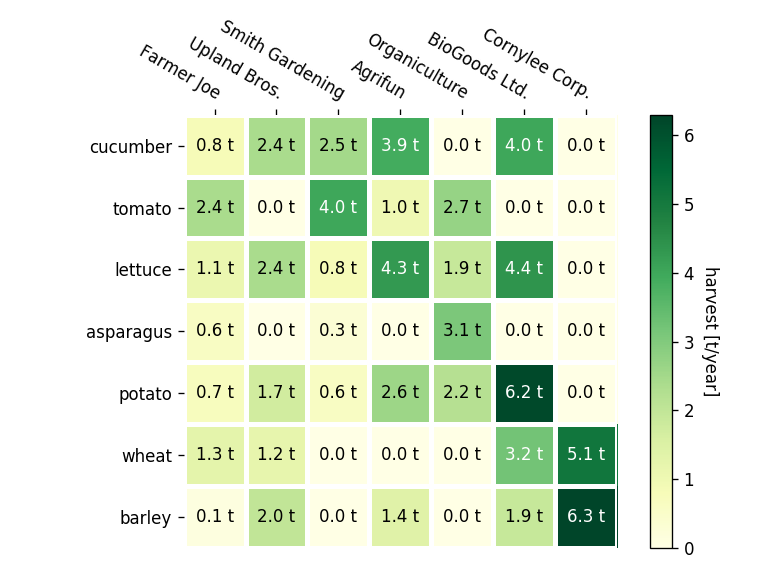

In [6]:
fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

# Calculus

In [172]:
# Utils
import re
class DiceExpr:
    def __init__(self, n, dices_type=None):
        self.n = n
        self.dices_type = dices_type
        
        if self.dices_type is None:
            self.avg = n
        else:
            self.avg = n * (self.dices_type + 1)/2

        
def parse_dice_expr(d, throw_if_none=False):
    assert(type(d) is str)
    res = re.fullmatch(r"([1-9][0-9]*)?D([36])?|([0-9]+)", d)
    if res is None:
        if throw_if_none:
            raise AttributeException(f"wrong input {d}")
        else:
            return None
    else:
        try:
            if res.group(1) is None:
                n_dices = 1
            else:
                n_dices = int(res.group(1))
            dices_type = int(res.group(2))
            return DiceExpr(n_dices, dices_type)
        except TypeError:
            try:
                flat = int(res.group(3))
                return DiceExpr(flat)
            except TypeError:
                raise Excpeption("badly handle case")
            
assert(parse_dice_expr("5").avg == 5)
assert(parse_dice_expr("D7") is None)
assert(parse_dice_expr("0D6") is None)
assert(parse_dice_expr("0").avg == 0)
assert(parse_dice_expr("100D6").avg == 350)
assert(parse_dice_expr("D3").avg == 2)
assert(parse_dice_expr("3D3").avg == 6)
assert(parse_dice_expr("D6").avg == 3.5)

def parse_roll(roll):
    res = re.fullmatch(r"([23456])\+", roll)
    if res is None:
        return None
    else:
        return int(res.group(1))

assert(parse_roll("1+") is None)
assert(parse_roll("1+") is None)
assert(parse_roll("2+") == 2)
assert(parse_roll("3+") == 3)
assert(parse_roll("6+") == 6)
assert(parse_roll("7+") is None)
assert(parse_roll("3") is None)

def float_eq(a, b):
    return np.isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)

def prob_by_roll_result(dice_expr):
    if dice_expr.dices_type is None:
        return {dice_expr.n: 1}
    else:
        roll_results_counts = {}
        def f(n, current_sum):
            if n == 0:
                roll_results_counts[current_sum] = roll_results_counts.get(current_sum, 0) + 1
            else:
                for i in range(1, dice_expr.dices_type + 1):
                    f(n - 1, current_sum + i)
        f(dice_expr.n, 0)
        n_cases = sum(roll_results_counts.values())
        for key in roll_results_counts.keys():
            roll_results_counts[key] /= n_cases
        return roll_results_counts
    
assert(prob_by_roll_result(parse_dice_expr("D3")) == {1: 1/3, 2: 1/3, 3: 1/3})
assert(prob_by_roll_result(parse_dice_expr("7")) == {7: 1})
assert(float_eq(1, sum(prob_by_roll_result(parse_dice_expr("2D6")).values())))
assert(prob_by_roll_result(parse_dice_expr("2D6")) == {2: 1/36, 3: 2/36, 4: 3/36, 5: 4/36, 6: 5/36, 7: 6/36, 8: 5/36, 9: 4/36, 10: 3/36, 11: 2/36, 12: 1/36})

In [173]:
# Core Classes
class Bonuses:
    def __init__(self, to_hit, to_wound, props = None):
        assert(to_hit in {-1, 0, 1})
        assert(to_wound in {-1, 0, 1})

        self.to_hit = to_hit
        self.to_wound = to_wound
        self.props = props if props is not None else {}
        
    def empty():
        return Bonuses(0, 0)
    
Bonuses.empty().to_hit = 0
        
class Weapon:
    def __init__(self, hit, a, s, ap, d, bonuses):
        self.hit = parse_dice_expr(hit, True)
        self.a        = parse_dice_expr(a, True)
        self.s        = parse_dice_expr(s, True)
        self.ap       = parse_dice_expr(ap, True)
        assert(self.ap.n >= 0)
        self.d        = parse_dice_expr(d, True)
        self.bonuses  = bonuses
        
        
Weapon(hit="5", a="2", s = "4D3", ap = "1", d="D3", bonuses=Bonuses.empty())
        
class Target:
    def __init__(self, t, sv, invu=None, fnp=None):

        
        assert(invu is None or (type(invu) is int and invu > 0 and invu <= 6))
        self.invu   = invu
        
        assert(fnp is None or (type(fnp) is int and fnp > 0 and fnp <= 6))
        self.fnp   = fnp
        
        assert(type(t) is int and t > 0)
        self.t    = t
        
        assert(type(sv) is int and sv > 0 and sv <= 6)
        self.sv   = sv


Target(8, 3, 5, 6)
Target(8, 3)

In [174]:
# Engine v1

def compute_successes_ratio(modified_necessary_roll, auto_success_on_6=True):
    necessary_roll = modified_necessary_roll
    if modified_necessary_roll <= 1:
        necessary_roll = 2  # roll of 1 always fails
    if modified_necessary_roll >= 7:
        if auto_success_on_6:
            necessary_roll = 6  # roll of 6 always succeeds
        else:
            return 0
    return (7 - necessary_roll)/6

def compute_n_hits_ratio(weapon):
    return compute_successes_ratio(weapon.hit.avg - weapon.bonuses.to_hit)


assert(compute_n_hits_ratio(Weapon(hit="2", a="12", s = "4", ap = "1", d="2D3", bonuses=Bonuses.empty())) == 5/6)
assert(compute_n_hits_ratio(Weapon(hit="5", a="12", s = "4", ap = "1", d="2D3", bonuses=Bonuses.empty())) == 1/3)
assert(compute_n_hits_ratio(Weapon(hit="3", a="1", s = "4", ap = "1",  d="2D3", bonuses=Bonuses.empty())) == 2/3)
assert(compute_n_hits_ratio(Weapon(hit="3", a="1", s = "4", ap = "1",  d="2D3", bonuses=Bonuses(-1, 0))) == 1/2)
assert(compute_n_hits_ratio(Weapon(hit="2", a="1", s = "4", ap = "1",  d="2D3", bonuses=Bonuses(+1, 0))) == 5/6)  # roll of 1 always fails
assert(compute_n_hits_ratio(Weapon(hit="6", a="1", s = "4", ap = "1",  d="2D3", bonuses=Bonuses(-1, 0))) == 1/6)  # roll of 6 always succeeds

def compute_necessary_wound_roll(f, e):
    if f >= 2*e:
        return 2
    elif f > e:
        return 3
    elif f == e:
        return 4
    elif f <= e/2:
        return 6
    else:
        assert(f < e)
        return 5

def compute_n_wounds_ratios(weapon, target):
    return [prob*compute_successes_ratio(compute_necessary_wound_roll(f, target.t) - weapon.bonuses.to_wound)
     for f, prob in prob_by_roll_result(weapon.s).items()]

def compute_n_wounds_ratio(weapon, target):
    return sum(compute_n_wounds_ratios(weapon, target))

assert(compute_n_wounds_ratio(
    Weapon(hit="2", a="1", s = "4", ap = "1", d="2D3", bonuses=Bonuses(+1, 0)),
    Target(t=4, sv=3)
) == 1/2)

assert(compute_n_wounds_ratio(
    Weapon(hit="2", a="12", s = "4", ap = "1", d="2D3", bonuses=Bonuses(+1, 0)),
    Target(t=8, sv=3)
) == 1/6)

assert(compute_n_wounds_ratio(
    Weapon(hit="2", a="1", s = "4", ap = "1", d="2D3", bonuses=Bonuses(+1, -1)),
    Target(t=8, sv=3)
) == 1/6)  # roll of 6 always succeeds

assert(compute_n_wounds_ratio(
    Weapon(hit="2", a="1", s = "4", ap = "1", d="2D3", bonuses=Bonuses(+1, 0)),
    Target(t=2, sv=3)
) == 5/6)

assert(compute_n_wounds_ratio(
    Weapon(hit="2", a="1", s = "4", ap = "1", d="2D3", bonuses=Bonuses(+1, +1)),
    Target(t=2, sv=3)
) == 5/6)  # roll of 1 always fails

assert(compute_n_wounds_ratio(
    Weapon(hit="2", a="1", s = "2D3", ap = "1", d="2D3", bonuses=Bonuses(+1, 0)),
    Target(t=12, sv=3)
) == 1/6)

assert(float_eq(compute_n_wounds_ratio(
    Weapon(hit="2", a="1", s = "2D3", ap = "1", d="2D3", bonuses=Bonuses(+1, 0)),
    Target(t=1, sv=3)
), 5/6))

assert(compute_n_wounds_ratio(
    Weapon(hit="2", a="1", s = "2D3", ap = "1", d="2D3", bonuses=Bonuses(+1, 0)),
    Target(t=4, sv=3)
)< 1/2)



def n_figs_slained(weapon, target):
    hit_ratio = compute_n_hits_ratio(weapon)
    wound_ratio = compute_n_wounds_ratio(weapon, target)
    return weapon.a.avg * hit_ratio * wound_ratio
def total_n_figs_slained(weapons_list, target):
    print("tatata")

In [175]:
n_figs_slained(
    Weapon(hit="5", a="12", s = "4", ap = "1", d="2D3", bonuses=Bonuses(+1, 0)),
    Target(t=8, sv=3)
)

1.0

In [350]:
# Engine v2
# new version:
# 3 A, c 4, f 4 endu 4
# [0, 0, 0, 1] attacks density
def get_attack_density(weapon):
    assert(isinstance(weapon, Weapon))
    return {a: prob for a, prob in prob_by_roll_result(weapon.a).items()}
# [1/8, 3/8, 3/8 ,1/8] hit density
def get_hits_density(weapon, attack_density):
    assert(isinstance(weapon, Weapon))
    assert(isinstance(attack_density, dict))
    hits_density = {}
    for a, prob_a in attack_density.items(): 
        # {1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.3333333333333333}
        for hit_roll, prob_hit_roll in prob_by_roll_result(weapon.hit).items():
            # {5: 1}
            hits_ratio = compute_successes_ratio(hit_roll - weapon.bonuses.to_hit)
            # 0.5
            for hits, prob_hits in dispatch_density_key(a, hits_ratio).items():
                hits_density[hits] = hits_density.get(hits, 0) + prob_hits*prob_hit_roll*prob_a
    return hits_density

# [......]  woud density
def get_wounds_density(weapon, target, hits_density):
    assert(isinstance(weapon, Weapon))
    assert(isinstance(target, Target))
    assert(isinstance(hits_density, dict))
    wounds_density = {}
    for hits, prob_hits in hits_density.items(): 
        for s_roll, prob_s_roll in prob_by_roll_result(weapon.s).items():
            wounds_ratio = compute_successes_ratio(compute_necessary_wound_roll(s_roll, target.t) - weapon.bonuses.to_wound)
            for wounds, prob_wounds in dispatch_density_key(hits, wounds_ratio).items():
                wounds_density[wounds] = wounds_density.get(wounds, 0) + prob_wounds*prob_s_roll*prob_hits
    return wounds_density

# [......] unsaved wounds density
def get_unsaved_wounds_density(weapon, target, wounds_density):
    assert(isinstance(weapon, Weapon))
    assert(isinstance(target, Target))
    assert(isinstance(wounds_density, dict))
    unsaved_wounds_density = {}
    for wounds, prob_wounds in wounds_density.items(): 
        for ap_roll, prob_ap_roll in prob_by_roll_result(weapon.ap).items():
            save_roll = target.sv + ap_roll
            if target.invu is not None:
                save_roll = min(save_roll, target.invu)
            unsaved_wounds_ratio = 1 - compute_successes_ratio(save_roll, auto_success_on_6=False)
            for unsaved_wounds, prob_unsaved_wounds in dispatch_density_key(wounds, unsaved_wounds_ratio).items():
                unsaved_wounds_density[unsaved_wounds] = unsaved_wounds_density.get(unsaved_wounds, 0) + prob_unsaved_wounds*prob_ap_roll*prob_wounds
    return unsaved_wounds_density


# [......] damages density
def get_damages_density(weapon, unsaved_wounds_density):
    assert(isinstance(weapon, Weapon))
    assert(isinstance(unsaved_wounds_density, dict))
    damages_density = {}
    for unsaved_wounds, prob_unsaved_wounds in unsaved_wounds_density.items(): 
        for d_roll, prob_d_roll in prob_by_roll_result(weapon.d).items():
            key = (unsaved_wounds, d_roll)
            damages_density[key] = damages_density.get(key, 0) + prob_d_roll*prob_unsaved_wounds
    return damages_density

# [......] un fnp damages density
def get_pained_damages_density(target, damages_density):
    assert(isinstance(target, Target))
    assert(isinstance(damages_density, dict))
    if target.fnp is None:
        return damages_density
    else:
        pained_damages_density = {}
        for (unsaved_wounds, damages), prob_unsaved_wounds_and_damages in damages_density.items(): 
            fnp_fail_ratio = 1 - compute_successes_ratio(target.fnp, auto_success_on_6=False)
            for pd_roll, prob_pd_roll in dispatch_density_key(damages, fnp_fail_ratio).items():
                key = (unsaved_wounds, pd_roll)
                pained_damages_density[key] = pained_damages_density.get(key, 0) + prob_pd_roll*prob_unsaved_wounds_and_damages
        return pained_damages_density

# [......] n_figs_slained density

def dispatch_density_key(previous_density_key, next_density_prob):
    assert(type(previous_density_key) is int)
    assert(previous_density_key >= 0)
    assert(0 < next_density_prob and next_density_prob <= 1)
    n = previous_density_key
    p= next_density_prob
    return {k: scipy.special.comb(n, k)*p**k*(1-p)**(n-k) for k in range(0, n + 1)}

assert(dispatch_density_key(3, 0.5) == {0: 0.125, 1: 0.375, 2: 0.375, 3: 0.125})

In [351]:
# SAG vs Battlewagon under KFF and fnp 6+
w = Weapon(hit="5", a="D6", s = "2D6", ap = "5", d="D6", bonuses=Bonuses(0, 0))
t = Target(t=8, sv=4, invu=5, fnp=6)
a_d = get_attack_density(w)
a_d

{1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666}

In [352]:
sum(a_d.values()), prob_by_roll_result(w.hit), compute_successes_ratio(5 - w.bonuses.to_hit)

(0.9999999999999999, {5: 1}, 0.3333333333333333)

In [353]:
h_d = get_hits_density(w, a_d)
h_d, sum(h_d.values())

({0: 0.3040695016003659,
  1: 0.3683127572016462,
  2: 0.21467764060356656,
  3: 0.08664837677183355,
  4: 0.02263374485596708,
  5: 0.003429355281207132,
  6: 0.00022862368541380878},
 1.0000000000000002)

In [354]:
w_d = get_wounds_density(w, t, h_d)
w_d, sum(w_d.values())

({0: 0.6217603674937145,
  1: 0.2846423408112199,
  2: 0.07631852652283029,
  3: 0.015062093448999277,
  4: 0.002042890112422848,
  5: 0.00016757863943922687,
  6: 6.202971374405028e-06},
 1.0000000000000004)

In [355]:
uw_d = get_unsaved_wounds_density(w, t, w_d)
uw_d, sum(uw_d.values())

({0: 0.7257047583558546,
  1: 0.22723680281114117,
  2: 0.04124700514426789,
  3: 0.0053264415449203635,
  4: 0.0004607459023102358,
  5: 2.3701673374556312e-05,
  6: 5.445681316350097e-07},
 1.0000000000000004)

In [356]:
d_d = get_damages_density(w, uw_d)
d_d, sum(d_d.values())

({(0, 1): 0.12095079305930909,
  (0, 2): 0.12095079305930909,
  (0, 3): 0.12095079305930909,
  (0, 4): 0.12095079305930909,
  (0, 5): 0.12095079305930909,
  (0, 6): 0.12095079305930909,
  (1, 1): 0.037872800468523524,
  (1, 2): 0.037872800468523524,
  (1, 3): 0.037872800468523524,
  (1, 4): 0.037872800468523524,
  (1, 5): 0.037872800468523524,
  (1, 6): 0.037872800468523524,
  (2, 1): 0.0068745008573779815,
  (2, 2): 0.0068745008573779815,
  (2, 3): 0.0068745008573779815,
  (2, 4): 0.0068745008573779815,
  (2, 5): 0.0068745008573779815,
  (2, 6): 0.0068745008573779815,
  (3, 1): 0.0008877402574867272,
  (3, 2): 0.0008877402574867272,
  (3, 3): 0.0008877402574867272,
  (3, 4): 0.0008877402574867272,
  (3, 5): 0.0008877402574867272,
  (3, 6): 0.0008877402574867272,
  (4, 1): 7.679098371837263e-05,
  (4, 2): 7.679098371837263e-05,
  (4, 3): 7.679098371837263e-05,
  (4, 4): 7.679098371837263e-05,
  (4, 5): 7.679098371837263e-05,
  (4, 6): 7.679098371837263e-05,
  (5, 1): 3.950278895759385e

In [357]:
pd_d = get_pained_damages_density(t, d_d)
pd_d, sum(pd_d.values())

({(0, 0): 0.024189640132810625,
  (0, 1): 0.1451222864253284,
  (0, 2): 0.14485008492345883,
  (0, 3): 0.1425817390745456,
  (0, 4): 0.1312400098299795,
  (0, 5): 0.0972148220962811,
  (0, 6): 0.04050617587345047,
  (1, 0): 0.007574397744594327,
  (1, 1): 0.045441515994254694,
  (1, 2): 0.04535628271130727,
  (1, 3): 0.04464600535341208,
  (1, 4): 0.04109461856393612,
  (1, 5): 0.030440458195508238,
  (1, 6): 0.012683524248128434,
  (2, 0): 0.00137487070259332,
  (2, 1): 0.008248340149091638,
  (2, 2): 0.008232868985896662,
  (2, 3): 0.00810394262593855,
  (2, 4): 0.0074593108261479845,
  (2, 5): 0.005525415426776285,
  (2, 6): 0.0023022564278234524,
  (3, 0): 0.0001775442460264199,
  (3, 1): 0.0010651513120307568,
  (3, 2): 0.0010631534397949004,
  (3, 3): 0.001046504504496099,
  (3, 4): 0.0009632598280020911,
  (3, 5): 0.0007135257985200676,
  (3, 6): 0.0002973024160500282,
  (4, 0): 1.5357867564217568e-05,
  (4, 1): 9.213733000159678e-05,
  (4, 2): 9.196451078669562e-05,
  (4, 3): 9